In [1]:
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('whitegrid')
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
import plotly
plotly.tools.set_credentials_file(username='cris8a', api_key='5ww4s0lxiv')
import plotly.plotly as py

%matplotlib inline

# Playing with $k^{*}(x,y,l,r,params)$

The purpose of this notebook is to find a solution to a problem that arises when solving for the model with capital, for ceratin parameter combinations.

A first idea is to plot the solution for $k^{*}$ and see if indeed has a kink on it, and the size of this kink.

In [2]:
## Setting the parameters of the model (calibrated values)
R, rho, gamma, eta, L, A, kapa = sym.var('R, rho, gamma, eta, L, A, kapa')
### Defining variables ###
k, x, y, l, r = sym.var('k, x, y, l, r')

## Defining auxiliary functions a, c, d ##
a = -2*R
c = r*A*kapa*(eta**2)
d = r*A*kapa*eta*(1-eta)*(y*(l/r)**x)**(0.25)
K = sym.var('K')

## Defining the polynomial to solve ##
pol_K = K**3*a + K*c + d
polik = sym.lambdify((K,x,y,l,r,A,kapa,eta,R),pol_K)

## Defining auxiliary functions p, q ##

p = -(eta**2*A*r*kapa)/(2*R)
q = -(eta*(1-eta)*kapa*r*A*(y*(l/r)**x)**(1/4))/(2*R)

In [3]:
## The Roots: Hyperbolic approach ##

# CASE 1: In case p<0 and 4p^3+27q^2>0 we have one root:
hyper_root = 2 * (-p/3)**(0.5) * sym.cosh( (1/3)*sym.acosh( ((3*q)/(2*p)) * (-3/p)**(0.5) ) )

# CASE 2: In case p>0, we also have one root:
hyper_root2 = -2* (p/3)**(0.5) * sym.sinh( (1/3)*sym.asinh( ((3*q)/(2*p)) * (3/p)**(0.5) ) )

# CASE 3: In case p<0 and 4p^3+27q^2<=0 we have three roots, of which the biggest is:
root_zero = (2*(-p/3)**(0.5))*sym.cos( (1/3)*sym.acos( ((3*q)/(2*p)) * (-3/p)**(1/2) ) )


In [4]:
# Lambdifying the roots ##
HRt = sym.lambdify((x,y,l,r,A,kapa,eta,R), hyper_root)
HRt2 = sym.lambdify((x,y,l,r,A,kapa,eta,R), hyper_root2)
Rt0 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_zero)

In [5]:
## Trigonometric condition function ##

def trig_condition(x,y,l,r,A,kappa,eta,R):
    '''
    Condition for three real roots
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: An interger for the case in which we are in (see above)
    '''
    p = -(eta**2*A*r*kappa)/(2*R)
    q = -(eta*(1-eta)*kappa*r*A*(y*(l/r)**x)**(1/4))/(2*R)
    pq = 4*p**3+27*q**2
    if p<0 and pq<=0:
        return 3
    elif p<0 and pq>0:
        return 1
    elif p>0:
        return 2


In [6]:
## Integrated function for case 1 and 3 ##

def My_k_star(x,y,l,r,A,kappa,eta,R):
    '''
    Function that returns the root that applies 
    depending on the parameters we have (input).
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: Tuple with
            - a float with the value of the root.
            - an interger with the case.
    '''
    if trig_condition(x,y,l,r,A,kappa,eta,R) == 1:
        return (HRt(x,y,l,r,A,kappa,eta,R),1)
    elif trig_condition(x,y,l,r,A,kappa,eta,R) == 3:
        return (Rt0(x,y,l,r,A,kappa,eta,R),3)

In [7]:
## Plotting cell 1 ##

y_range=np.linspace(1e-3,10,10000)

k_stars1 = []
y1 = []
y3 = []
k_stars3 = []

## For a certain range of y and parameters of the poor country ##
for i in y_range:
    kt, case = My_k_star(1,i,i,1.0,0.5105,1.0,0.89,0.83684)
    if case==1:
        k_stars1.append(kt**4)
        y1.append(i)
    elif case==3:
        k_stars3.append(kt**4)
        y3.append(i)

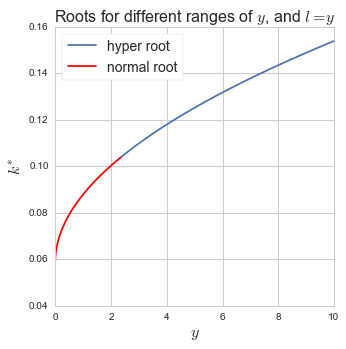

In [8]:
## Plotting cell 2 ##
plt.figure(figsize=(5,5))
plt.plot(y1,k_stars1, label='hyper root')
plt.plot(y3,k_stars3, c='r', label='normal root')
plt.legend(loc='best', fontsize=14, frameon=True)
plt.xlabel('$y$', fontsize=16)
plt.ylabel('$k^{*}$', fontsize=16)
plt.title('Roots for different ranges of $y$, and $l=y$', fontsize=16)
plt.show()

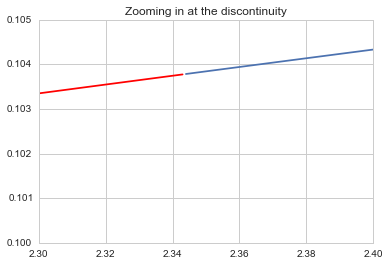

In [9]:
## Plotting cell 3 ##

plt.plot(y1,k_stars1, label='hyper root')
plt.plot(y3,k_stars3, c='r', label='normal root')
plt.xlim(2.3,2.4)
plt.ylim(0.1,0.105)
plt.title('Zooming in at the discontinuity')
plt.show()

Good news! There seems to be no kink.

### Let's play with $l$ now

In [10]:
## Plotting cell 1 ##

l_range=np.linspace(1e-3,5.0,10000)

kl_stars1 = []
l1 = []
l3 = []
kl_stars3 = []

## For a certain range of y and parameters of the poor country ##
for i in l_range:
    kt, case = My_k_star(1,2,i,1.0,0.5105,1.0,0.89,0.83684)
    if case==1:
        kl_stars1.append(kt**4)
        l1.append(i)
    elif case==3:
        kl_stars3.append(kt**4)
        l3.append(i)

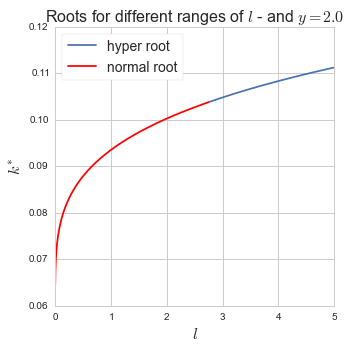

In [11]:
## Plotting cell 2 ##
plt.figure(figsize=(5,5))
plt.plot(l1,kl_stars1, label='hyper root')
plt.plot(l3,kl_stars3, c='r', label='normal root')
plt.legend(loc='best', fontsize=14, frameon=True)
plt.xlabel('$l$', fontsize=16)
plt.ylabel('$k^{*}$', fontsize=16)
plt.title('Roots for different ranges of $l$ - and $y=2.0$', fontsize=16)
plt.show()

For replycaing R&A **we only need $l$ and $y$ to be free**: x is homogeneous (or almost) and the rest of the parameters are fixed for each country. As the developed country poses no problems so far, I'll focus in the poor country case.

Then this becomes a problem of fitting a surface $k^*(y,l)$.

## 3d Plotting

In [12]:
# 1. Get the Grid
y3d = np.linspace(1.2,10.0,100)
l3d = np.linspace(0.01,10.0,100)

k1r = []
k3r = []
y1r = []
y3r = []
l1r = []
l3r = []

# 1.1 Different points for different roots 
for y in y3d:
    for l in l3d:
        kt, case = My_k_star(1,y,l,1.0,0.5105,1.0,0.89,0.83684)
        if case==1:
            k1r.append(kt**4)
            l1r.append(l)
            y1r.append(y)
        elif case==3:
            k3r.append(kt**4)
            l3r.append(l)
            y3r.append(y)

k1r = np.array(k1r)
k3r = np.array(k3r)
y1r = np.array(y1r)
y3r = np.array(y3r)
l1r = np.array(l1r)
l3r = np.array(l3r)

In [38]:
# 1.2 Unique grid
ronda = 0
for y in y3d:
    k_line = np.empty(0)
    for l in l3d:
        kt, case = My_k_star(1,y,l,1.0,0.5105,1.0,0.89,0.83684)
        k_line = np.hstack((k_line,kt**4))
    if ronda == 0:
        k_array = k_line
        k_flat = k_line
        ronda = 42
    else:
        k_array = np.vstack((k_array,k_line))
        k_flat = np.hstack((k_flat,k_line))

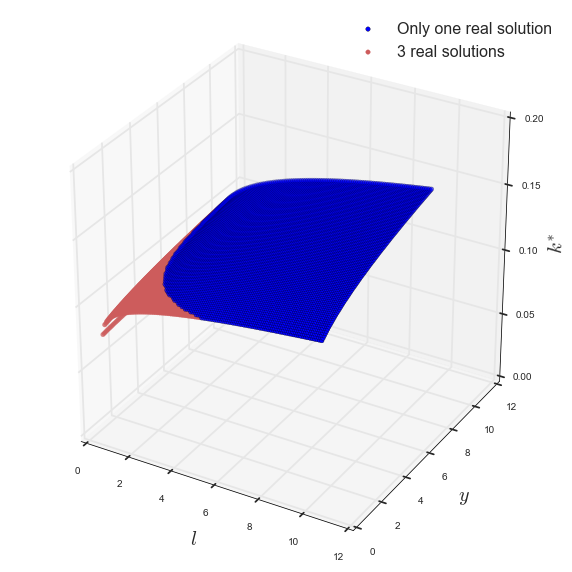

In [23]:
# 2.1 Different colors for different roots

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(l1r, y1r, zs=k1r, label='Only one real solution')
ax.scatter(l3r, y3r, zs=k3r, color='indianred', label='3 real solutions')
ax.set_ylim(0,12)
ax.set_xlim(0,12)
ax.set_zlim(0,0.2)
ax.set_xlabel('$l$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$k^*$', fontsize=20)
ax.legend(fontsize=16)

plt.show()

It seems that lower values of $l$ (land size) trigger the *3 real solutions case*, and this is specially tru for low values of $y$.

In [29]:
# 2.2 All roots, but cool to move around

# (*) Useful Python/Plotly tools
import plotly.tools as tls

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

trace1 = Surface(z=k_array, x=l3d, y=y3d)   # link 1d numpy array of y coords

# Package the trace dictionary into a data object
data = Data([trace1])

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = Layout(title='$k^*$', scene=Scene(xaxis=XAxis(title='l'),yaxis=YAxis(title='y'),zaxis=ZAxis(title='k*') ))

# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')

Re-doing this fancy chart in two colours for each case would be great, but it seems that compared to the graph above, it is for blue areas that the  *3 real solutions case* is triggered.

# Approximating $k^*$ with a log-linear polynomial function

There may be others, but it would be preferable something easily differentiable.

In [31]:
from scipy.optimize import leastsq

In [48]:
k_flat = np.empty(0)
y_flat = np.empty(0)
l_flat = np.empty(0)
for y in y3d:
    for l in l3d:
        kt, case = My_k_star(1,y,l,1.0,0.5105,1.0,0.89,0.83684)
        k_flat = np.hstack((k_flat,kt**4))
        y_flat = np.hstack((y_flat,y))
        l_flat = np.hstack((l_flat,l))

In [152]:
def res(params, y, a, b):
    a0, a1, a2, b1, b2, ab1, ab2, a2b, ab22, c1, c2, c3, c4 = params
    return a0 + a1*a + a2*a**2+ b1*b + b2*b**2 + ab1*a*b + ab2*a*b**2 + a2b*a**2*b + ab22*a**2*b**2 + c1*np.log(a) + c2*np.log(b) + c3*np.log(a)**2 + c4*np.log(b)**2 - y 

p_opt = leastsq(res,  np.array([0, 0.075, -0.003125, 0.12, 0, 0, 0, 0, 0, 0, 0, 0, 0]), args=(k_flat, y_flat,l_flat))

In [153]:
# Solution parameters
p_opt

(array([  9.17588411e-02,  -2.54383863e-03,   1.19799197e-04,
         -2.49007510e-03,   1.69210383e-04,   9.42861430e-04,
         -5.05040007e-05,  -3.91915926e-05,   2.10570303e-06,
          1.01634440e-02,   1.00022516e-02,   1.23659060e-03,
          7.89111306e-04]), 1)

In [154]:
# For the plot
def k_fit(params, a, b):
    a0, a1, a2, b1, b2, ab1, ab2, a2b, ab22, c1, c2, c3, c4 = params
    return a0 + a1*a + a2*a**2+ b1*b + b2*b**2 + ab1*a*b + ab2*a*b**2 + a2b*a**2*b + ab22*a**2*b**2 + c1*np.log(a) + c2*np.log(b) + c3*np.log(a)**2 + c4*np.log(b)**2 

ronda = 0
for y in y3d:
    k_line = np.empty(0)
    for l in l3d:
        kt= k_fit(p_opt[0],y,l)
        k_line = np.hstack((k_line,kt))
    if ronda == 0:
        k_fitted = k_line
        ronda = 42
    else:
        k_fitted = np.vstack((k_fitted,k_line))

In [155]:
# Sum of squared residuals
np.sum((k_fitted-k_array)**2)

0.0014858161267425301

In [165]:
trace1 = Surface(z=k_array, x=l3d, y=y3d, colorscale='Greys')
trace2 = Surface(z=k_fitted, x=l3d, y=y3d, colorscale='Greens')   # link 1d numpy array of y coords

# Package the trace dictionary into a data object
data = Data([trace1, trace2])

# Dictionary of style options for all axes

# Make a layout object
layout = Layout(title='Fitted k* ', scene=Scene(xaxis=XAxis(title='l'),yaxis=YAxis(title='y'),zaxis=ZAxis(title='k*')))

# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')

Note that the greens are the fitted values, real values are in greys. Perfect fit would require seeing no green.

In [164]:
trace3 = Surface(z=k_fitted-k_array, x=l3d, y=y3d, colorscale='Portland')   # link 1d numpy array of y coords

# Package the trace dictionary into a data object
data = Data([trace3])

# Make a layout object
layout = Layout(title='Residual plot', scene=Scene(xaxis=XAxis(title='l'),yaxis=YAxis(title='y'),zaxis=ZAxis(title='k*') ))

# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')

Fit is quite good, gets worse for low $l$. Hopefully these low levels are never chosen optimally. But that would be difficult to say, as optimal $l^*$ depends on this function that we are approximating. Land should be cheaper but we also expect smaller plots in developing countries.

Maybe try a hyperbolic function to fit this one?

## *...to be continued*